# Recency Frequency Monetary Analysis

## Data Cleaning and Preparation

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv",encoding="ISO-8859-1", dtype={'CustomerID':str, 'InvoiceID':str})

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [4]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829,541909
unique,25900,4070,4223,NaN,23260,NaN,4372,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,17841,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,7983,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,NaN,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,NaN,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,NaN,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,NaN,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,NaN,NaN


## Where does the buyer come from?

In [5]:
df_country_count = df.groupby('Country')['CustomerID'].nunique()

In [6]:
df_country_count.sort_values(ascending=False).head(10)

Country
United Kingdom    3950
Germany             95
France              87
Spain               31
Belgium             25
Switzerland         21
Portugal            19
Italy               15
Finland             12
Austria             11
Name: CustomerID, dtype: int64

### It seems the market is specific for the UK, as such the clustering will be done specifically by it. This assumed that the UK samples are more homogenous.

In [7]:
df.Quantity.describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

Quantity shouldn't be able to retain a value below one, and it is illogical to see a maximum value to the thousands either.

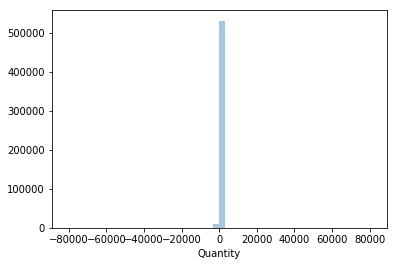

In [8]:
sns.distplot(df.Quantity, kde=False)

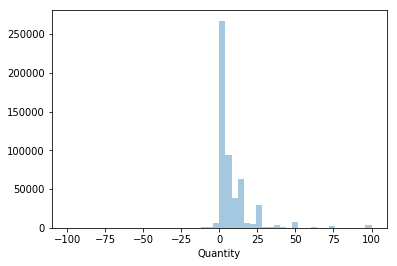

In [9]:
sns.distplot(df[df['Quantity'].between(-100,100)].Quantity, kde=False)

In [10]:
df[df['Quantity'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,12/1/2010 10:24,3.45,17548,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,12/1/2010 10:24,1.65,17548,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,12/1/2010 10:24,1.65,17548,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,12/1/2010 12:38,4.25,17897,United Kingdom


## Checking NA values in the CustomerID
(Remember that the customers should be able to be identified post clustering, thus retaining NA customers is of no use.)

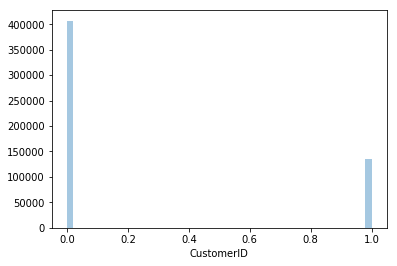

In [11]:
sns.distplot(df.CustomerID.isnull(),kde=False)
plt.show()

## Check the minimum and maximum Invoice Date

In [12]:
df.InvoiceDate.min()

'1/10/2011 10:04'

In [13]:
df.InvoiceDate.max()

'9/9/2011 9:52'

From the figure above, there were almost 150000 purchased items entry without a user identifier. We will remove these data to be able to continue with the analysis.

It seems that the dataset contains data with quantity below or equal to zero. It could be assumed that these data are cancelled items. While it is tempting to analyze it, these data should be removed so that we could continue with our RFM analysis.

## Therefore, let's put the dataset into context: only UK and only purchased items (Quantity above 0).

In [14]:
df_cleaned = df[(df['Country']=='United Kingdom') & (df['Quantity']>0)]
df_cleaned.dropna(subset=['CustomerID'],how='all',inplace=True)
df_cleaned = df_cleaned[df_cleaned['InvoiceDate']>= "2010-12-09"]
df_cleaned.shape

C:\Users\Amri\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(176137, 8)

## RFM

RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

RECENCY (R): Days since last purchase  
FREQUENCY (F): Total number of purchases  
MONETARY VALUE (M): Total money this customer spent.  

The analysis will be done per customer.

In [15]:
df_cleaned['InvoiceDate'] = pd.DatetimeIndex(df_cleaned['InvoiceDate']).date

In [16]:
df_cleaned.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

In [17]:
now = dt.date(2011,12,9)
print(now)

2011-12-09


## Derive Recency

In [18]:
recency_df = df_cleaned.groupby(by='CustomerID', as_index=False)['InvoiceDate'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']

In [19]:
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (now - x).days)
recency_df = recency_df.drop(columns='LastPurchaseDate')
recency_df.head()

,CustomerID,Recency
0,12747,109
1,12748,70
2,12749,130
3,12820,74
4,12821,214


In [20]:
recency_df.CustomerID.nunique()

2864

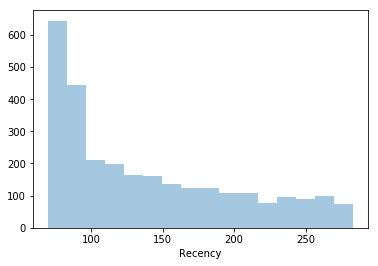

In [21]:
sns.distplot(recency_df.Recency,kde=False)
plt.show()

# Derive Frequency

Frequency enables us to understand the amount of a customer's purchase per period. This could be done by checking the number of invoices generated at a predetermined time frame.

In [22]:
df_cleaned_copy = df_cleaned.copy()
df_cleaned_copy.drop_duplicates(subset=['InvoiceNo','CustomerID'], keep='first', inplace=True)

In [23]:
df_cleaned_copy[df_cleaned_copy['CustomerID']== '12748']['InvoiceNo'].count()

96

In [24]:
frequency_df = df_cleaned_copy.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12747,5
1,12748,96
2,12749,3
3,12820,1
4,12821,1


# Monetary

In [25]:
df_cleaned[df_cleaned.CustomerID == "12747"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
106282,545321,20711,JUMBO BAG TOYS,20,2011-03-01,1.95,12747,United Kingdom
106283,545321,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,10,2011-03-01,1.95,12747,United Kingdom
106284,545321,22386,JUMBO BAG PINK POLKADOT,20,2011-03-01,1.95,12747,United Kingdom
106285,545321,85099F,JUMBO BAG STRAWBERRY,20,2011-03-01,1.95,12747,United Kingdom
106286,545321,48194,DOORMAT HEARTS,2,2011-03-01,7.95,12747,United Kingdom
106287,545321,71459,HANGING JAM JAR T-LIGHT HOLDER,12,2011-03-01,0.85,12747,United Kingdom
106288,545321,85062,PEARL CRYSTAL PUMPKIN T-LIGHT HLDR,12,2011-03-01,1.65,12747,United Kingdom
106289,545321,22763,KEY CABINET MA CAMPAGNE,4,2011-03-01,9.95,12747,United Kingdom
106290,545321,21745,GAOLERS KEYS DECORATIVE GARDEN,4,2011-03-01,3.75,12747,United Kingdom
106291,545321,21136,PAINTED METAL PEARS ASSORTED,16,2011-03-01,1.69,12747,United Kingdom


In [26]:
df_cleaned['TotalCost'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

In [27]:
monetary_df = df_cleaned.groupby(by='CustomerID', as_index=False).agg({'TotalCost':'sum'})

In [28]:
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12747,1760.09
1,12748,14680.85
2,12749,2755.23
3,12820,217.77
4,12821,92.72


In [29]:
rfm_df = recency_df.merge(frequency_df, on='CustomerID').merge(monetary_df, on='CustomerID')

In [30]:
rfm_df.columns = ['CustomerID','Recency','Frequency','Monetary']
rfm_df.set_index('CustomerID', inplace=True)
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12747,109,5,1760.09
12748,70,96,14680.85
12749,130,3,2755.23
12820,74,1,217.77
12821,214,1,92.72


In [31]:
rfm_df.describe()

,Recency,Frequency,Monetary
count,2864.000000,2864.000000,2864.000000
mean,138.352304,3.068785,1303.801632
std,61.908018,4.445087,4682.382530
min,70.000000,1.000000,2.900000
25%,85.000000,1.000000,258.077500
50%,119.000000,2.000000,518.350000
75%,183.000000,3.000000,1182.972500
max,283.000000,96.000000,141789.320000


## Customer segments using Quintiles

Assign score 1-5 to recency, frequency and monetary for each customer. Where 5 corresponds for the best value and 1 is the worst value. The RFM Score will be a combination of those three numerical values concatenated as a string.

In [32]:
quintiles = rfm_df.quantile(q=[0.2,0.4,0.6,0.8])
quintiles.head()

,Recency,Frequency,Monetary
0.2,80.0,1.0,216.734
0.4,99.2,1.0,380.990
0.6,140.0,2.0,712.698
0.8,200.0,4.0,1489.036


In [33]:
quintiles.to_dict()

{'Recency': {0.2: 80.0, 0.4: 99.20000000000005, 0.6: 140.0, 0.8: 200.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 2.0, 0.8: 4.0},
 'Monetary': {0.2: 216.734,
  0.4: 380.9900000000001,
  0.6: 712.6980000000003,
  0.8: 1489.036}}

## Creation of RFM Segments¶
Create two functions that handles segmentation classes in these conditions: high recency is bad, while high frequency and monetary value is good

In [34]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quintiles dict)
def RScore(x,p,d):
    if x <= d[p][0.20]:
        return 5
    elif x <= d[p][0.40]:
        return 4
    elif x <= d[p][0.60]: 
        return 3
    elif x <= d[p][0.80]: 
        return 2
    else:
        return 1

# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.20]:
        return 1
    elif x <= d[p][0.40]:
        return 2
    elif x <= d[p][0.60]: 
        return 3
    elif x <= d[p][0.80]: 
        return 4
    else:
        return 5

In [36]:
#create rfm segmentation table
rfm_segmentation = rfm_df.copy()
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quintiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quintiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quintiles,))

In [37]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12747,109,5,1760.09,3,5,5
12748,70,96,14680.85,5,5,5
12749,130,3,2755.23,3,4,5
12820,74,1,217.77,5,1,2
12821,214,1,92.72,1,1,1


Now that we have the score of each customer, we can represent our customer segmentation. First, we need to combine the scores (R_Quartile, F_Quartile,M_Quartile) together.

In [38]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
12747,109,5,1760.09,3,5,5,355
12748,70,96,14680.85,5,5,5,555
12749,130,3,2755.23,3,4,5,345
12820,74,1,217.77,5,1,2,512
12821,214,1,92.72,1,1,1,111


Best Recency score = 5: most recently purchase. Best Frequency score = 5: most quantity purchase. Best Monetary score = 5: spent the most.  

Let's see who are our Champions (best customers).

In [44]:
rfm_segmentation[rfm_segmentation['RFMScore']=='555'].sort_values('Monetary', ascending=False).head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
18102,72,34,141789.32,5,5,5,555
17450,70,28,140533.94,5,5,5,555
17949,70,32,50519.20,5,5,5,555
17511,73,17,46048.53,5,5,5,555
13694,71,32,40756.90,5,5,5,555


We can find here a suggestion of key segments and then we can decide which segment to consider for further study:  
https://www.blastam.com/blog/rfm-analysis-boosts-sales  

Note: the suggested link use the opposite valuation: 1 as highest/best score and 5 is the lowest.  
  
How many customers do we have in each segment?

In [43]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='555']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==5]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==5]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='355']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='155']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  156
Loyal Customers:  474
Big Spenders:  573
Almost Lost:  49
Lost Customers:  1
Lost Cheap Customers:  218


## Reference:  

https://www.kaggle.com/sarahm/customer-segmentation-using-rfm-analysis/data  
https://www.blastam.com/blog/rfm-analysis-boosts-sales  